# Loading Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("training_processed_dataset.csv")
df.head()

,review,sentiment,clean_lowercase,clean_lowercase_re,no_stopwords,tokens,lemmatized,revised_tokens
0,In Panic In The Streets Richard Widmark plays ...,1,in panic in the streets richard widmark plays ...,in panic in the streets richard widmark plays ...,panic streets richard widmark plays us navy do...,"['panic', 'streets', 'richard', 'widmark', 'pl...",panic street richard widmark play u navy docto...,"['panic', 'street', 'richard', 'widmark', 'pla..."
1,If you ask me the first one was really better ...,0,if you ask me the first one was really better ...,if you ask me the first one was really better ...,ask first one really better one look sarah g r...,"['ask', 'first', 'one', 'really', 'better', 'o...",ask first one really better one look sarah g r...,"['ask', 'first', 'one', 'really', 'better', 'o..."
2,I am a big fan a Faerie Tale Theatre and I've ...,1,i am a big fan a faerie tale theatre and i've ...,i am a big fan a faerie tale theatre and ive s...,big fan faerie tale theatre ive seen one best ...,"['big', 'fan', 'faerie', 'tale', 'theatre', 'i...",big fan faerie tale theatre ive seen one best ...,"['big', 'fan', 'faerie', 'tale', 'theatre', 'i..."
3,I just finished reading a book about Dillinger...,0,i just finished reading a book about dillinger...,i just finished reading a book about dillinger...,finished reading book dillinger movie horribly...,"['finished', 'reading', 'book', 'dillinger', '...",finished reading book dillinger movie horribly...,"['finished', 'reading', 'book', 'dillinger', '..."
4,Greg Davis and Bryan Daly take some crazed sta...,0,greg davis and bryan daly take some crazed sta...,greg davis and bryan daly take some crazed sta...,greg davis bryan daly take crazed statements t...,"['greg', 'davis', 'bryan', 'daly', 'take', 'cr...",greg davis bryan daly take crazed statement te...,"['greg', 'davis', 'bryan', 'daly', 'take', 'cr..."


In [3]:
df.shape

(25000, 8)

# Reduce Size

In [4]:
sampled_df = df.sample(n=5000, random_state=42)

In [5]:
sampled_df.head()

,review,sentiment,clean_lowercase,clean_lowercase_re,no_stopwords,tokens,lemmatized,revised_tokens
6868,Lars Von Triers Europa is an extremely good fi...,1,lars von triers europa is an extremely good fi...,lars von triers europa is an extremely good fi...,lars von triers europa extremely good film how...,"['lars', 'von', 'triers', 'europa', 'extremely...",lars von trier europa extremely good film hows...,"['lars', 'von', 'trier', 'europa', 'extremely'..."
24016,It WAS supposed to be the last Freddy movie (a...,0,it was supposed to be the last freddy movie (a...,it was supposed to be the last freddy movie an...,supposed last freddy movie yearsyou would thin...,"['supposed', 'last', 'freddy', 'movie', 'years...",supposed last freddy movie yearsyou would thin...,"['supposed', 'last', 'freddy', 'movie', 'years..."
9668,Had a bad day? Dog bit the mailman? Car wouldn...,1,had a bad day? dog bit the mailman? car wouldn...,had a bad day dog bit the mailman car wouldnt ...,bad day dog bit mailman car wouldnt start peop...,"['bad', 'day', 'dog', 'bit', 'mailman', 'car',...",bad day dog bit mailman car wouldnt start peop...,"['bad', 'day', 'dog', 'bit', 'mailman', 'car',..."
13640,A female vampire kills young women and paints ...,0,a female vampire kills young women and paints ...,a female vampire kills young women and paints ...,female vampire kills young women paints blood ...,"['female', 'vampire', 'kills', 'young', 'women...",female vampire kill young woman paint blood as...,"['female', 'vampire', 'kill', 'young', 'woman'..."
14018,New York I Love You is full of love and power....,1,new york i love you is full of love and power....,new york i love you is full of love and power ...,new york love full love power everybody howeve...,"['new', 'york', 'love', 'full', 'love', 'power...",new york love full love power everybody howeve...,"['new', 'york', 'love', 'full', 'love', 'power..."


In [6]:
import ast
sampled_df["revised_tokens"] = sampled_df["revised_tokens"].apply(ast.literal_eval)

In [7]:
from gensim.corpora import Dictionary

In [8]:
dictionary = Dictionary(sampled_df["revised_tokens"])
corpus = [dictionary.doc2bow(text) for text in sampled_df["revised_tokens"]]

In [9]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel

In [10]:
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=10,
                     passes=10,
                     iterations=50,
                     eval_every=1,
                     per_word_topics=True)

In [11]:
print(f"LDA Perplexity: {lda_model.log_perplexity(corpus)}")
coherence_lda = CoherenceModel(model=lda_model, texts=sampled_df["revised_tokens"], dictionary=dictionary, coherence='c_v')
print(f"LDA Coherence Score: {coherence_lda.get_coherence()}")

LDA Perplexity: -9.049006200111316
LDA Coherence Score: 0.46582916479820274


In [19]:
import numpy as np
perplexity_score = -9.049006200111316
print("LDA Perplexity Score : ",np.exp(perplexity_score))

LDA Perplexity Score :  0.00011750775810768631


# Coherence Curves

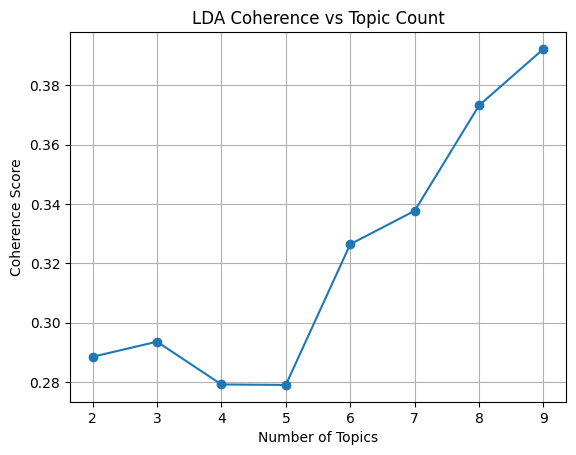

In [12]:
import matplotlib.pyplot as plt

coherences = []
topic_range = range(2, 10)

for k in topic_range:
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=3)
    coherence = CoherenceModel(model=model, texts=sampled_df["revised_tokens"], dictionary=dictionary, coherence='c_v').get_coherence()
    coherences.append(coherence)

plt.plot(topic_range, coherences, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence vs Topic Count')
plt.grid(True)
plt.show()

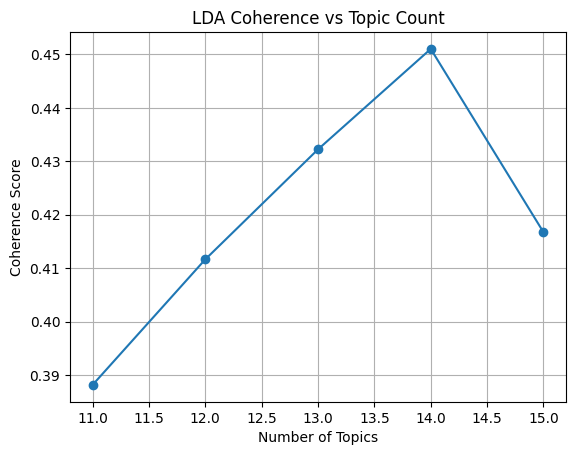

In [13]:
coherences = []
topic_range = range(11, 16)

for k in topic_range:
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, passes=3)
    coherence = CoherenceModel(model=model, texts=sampled_df["revised_tokens"], dictionary=dictionary, coherence='c_v').get_coherence()
    coherences.append(coherence)

plt.plot(topic_range, coherences, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence vs Topic Count')
plt.grid(True)
plt.show()

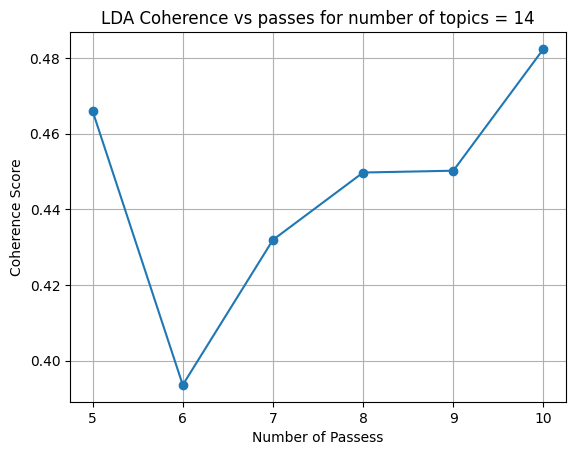

In [15]:
coherences = []
passes = range(5, 11)

for k in passes:
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=14, passes=k)
    coherence = CoherenceModel(model=model, texts=sampled_df["revised_tokens"], dictionary=dictionary, coherence='c_v').get_coherence()
    coherences.append(coherence)

plt.plot(passes, coherences, marker='o')
plt.xlabel('Number of Passess')
plt.ylabel('Coherence Score')
plt.title('LDA Coherence vs passes for number of topics = 14')
plt.grid(True)
plt.show()

# Perplexity Curves

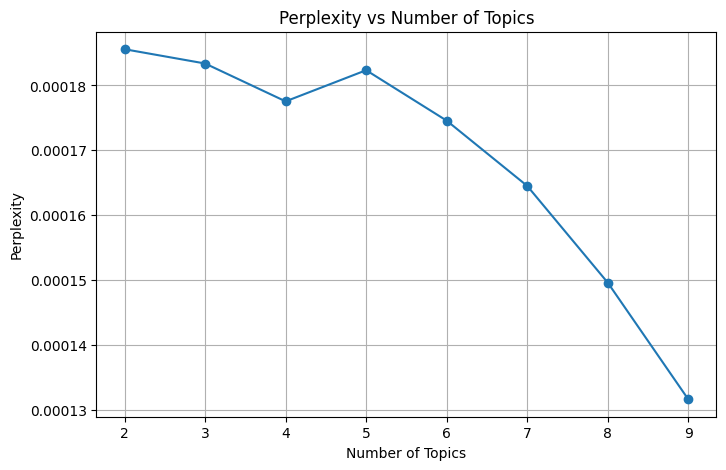

In [17]:
import numpy as np

topic_range = range(2, 10)  
perplexities = []

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    perplexity = np.exp(lda.log_perplexity(corpus))
    perplexities.append(perplexity)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()

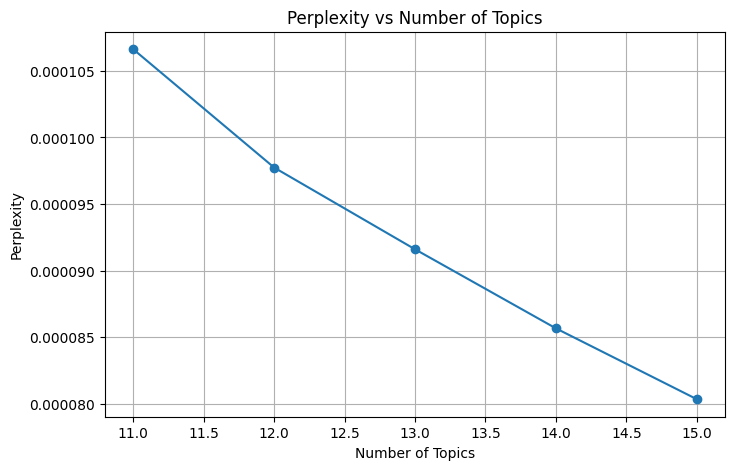

In [18]:
topic_range = range(11, 16)  
perplexities = []

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
    perplexity = np.exp(lda.log_perplexity(corpus))
    perplexities.append(perplexity)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.title('Perplexity vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.grid(True)
plt.show()